In [ ]:
Test vom jupyther notebook


In [32]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Hier werden die Amazon Reviews, welche als Menge von Json-Objekten vorliegen eingelesen und mithilfe des Panda-packages in einen Dataframe gespeichert.

In [162]:
with open('C:\\Users\\oscar\\Downloads\\Luxury_Beauty.json\\part_of_data.json') as f:
    data = [json.loads(line) for line in f]
    
df = pd.DataFrame.from_records(data)





In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         98 non-null     float64       
 1   vote            98 non-null     object        
 2   verified        98 non-null     int64         
 3   reviewTime      98 non-null     datetime64[ns]
 4   reviewerID      98 non-null     object        
 5   asin            98 non-null     object        
 6   reviewerName    98 non-null     object        
 7   reviewText      98 non-null     object        
 8   summary         98 non-null     object        
 9   unixReviewTime  98 non-null     int64         
 10  style           96 non-null     object        
 11  image           98 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(7)
memory usage: 8.9+ KB


Text(0.5, 1.0, 'Datentypen in den Daten')

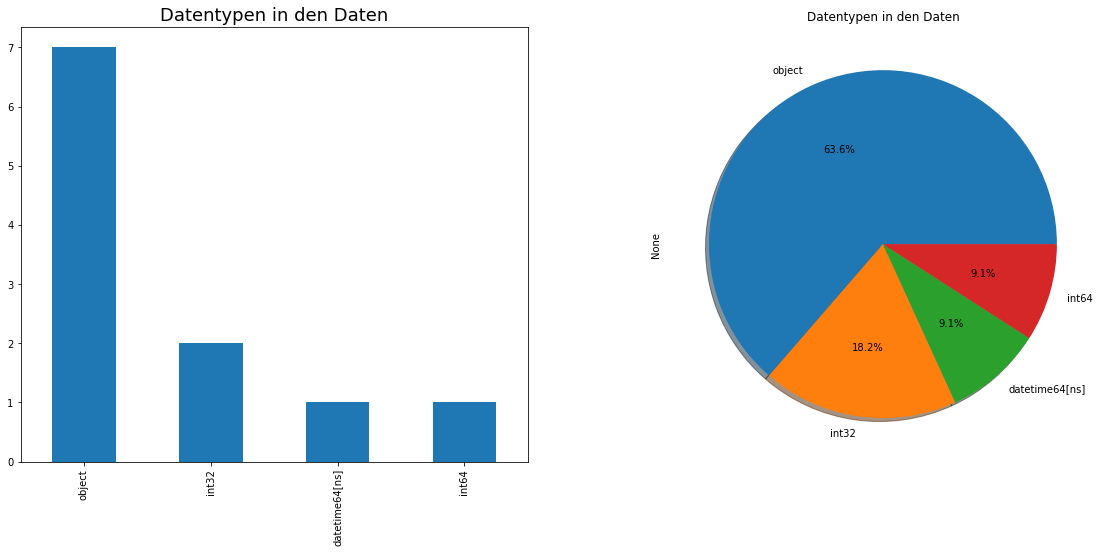

In [98]:
#Zeichen und Achesenbereich wird erstellt
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=None,autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('Datentypen in den Daten');
axarr[0].set_title("Datentypen in den Daten", fontsize=18)

In [156]:
# Eine Tabelle mit fehlenden Daten wird erstellt
missing_values=df.isnull().sum() # Fehlende Werte

percent_missing = df.isnull().sum()/df.shape[0]*100 # Fehldende werte in %

value = {
    'fehlende_werte ':missing_values,
    'fehlende_werte %':percent_missing , 
     'Datentyp' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,fehlende_werte,fehlende_werte %,Datentyp
overall,0,0.0,int32
vote,0,0.0,object
verified,0,0.0,int64
reviewTime,0,0.0,datetime64[ns]
reviewerID,0,0.0,object
asin,0,0.0,object
reviewerName,0,0.0,object
reviewText,0,0.0,object
summary,0,0.0,object
image,0,0.0,int32


In [154]:
#Hier werden in der Spalte verified die Werte die False sind auf 0 und die Werte die True sind auf 1 geändert
#Die Objektdaten werden nicht geändert, es sei denn, der Parameter inplace ist auf True gesetzt
#Ansonsten wird standardmäßig ein neuer DataFrame zurückgegeben
df['verified'].replace({False : 0, True : 1},inplace = True)

#Die NaN Werte in Spalte vote werden auf 0 gesetzt
df['vote'].fillna(0, inplace=True)

#Die Spalte reviewTime wird zu einem Datetime Object gemacht
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

#Wenn in der Spalte image ein Link zu dem Bild da ist gibt es eine 1 sonst den Wert Null, außerdem wird aus der Spalte image 
#ein int object

df.loc[df['image'].isnull(),'image'] = int(0)
df.loc[df['image'] != 0,'image'] = int(1)   
df[['image']] = df[['image']].astype(int)

#Die Spalte unixReviewTime wird nicht benötigt, da schon die Spalte reviewTime existiert
if 'unixReviewTime' in df.columns:
    del df['unixReviewTime']
    
#Die Spalte Style wird für die Analyse nicht weiter benötigt und deshalb gelöscht
if 'style' in df.columns:
    del df['style']

#Spalte overall leigt nur als int WErte vor, deshlab wird aus dieser spalte ein int object
df[['overall']] = df[['overall']].astype(int)


(array([ 6.,  0.,  2.,  0.,  0.,  5.,  0., 11.,  0., 75.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

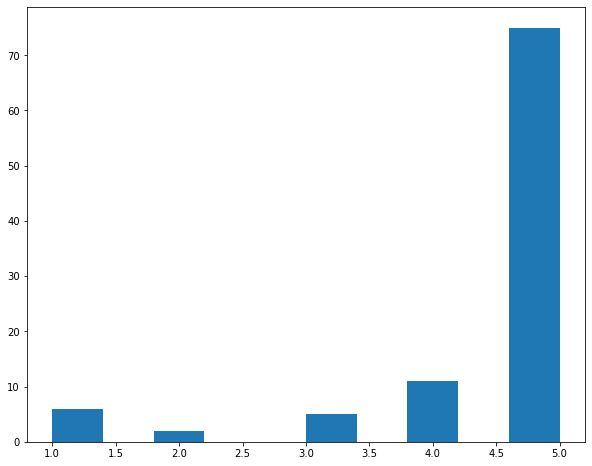

In [152]:
fig, axes = plt.subplots( 1,figsize=(10, 8))

axes.hist(df['overall'])

In [161]:
freq = df['reviewerID'].value_counts()
print(freq)

A1TQQZ6NVDTPNL    2
AUEUNR2AQQ0SY     2
ADWW3BMPLYEKD     2
A3DLQJC3K2ZIC5    1
AIYOTT3ZVJUEB     1
                 ..
A1Q7NVWYAGK8BQ    1
AX2K33SNI3WHN     1
A2L7MJNZFQXA5S    1
A3TMPSQ7X4M9LO    1
A1YR3F06HAYN3Y    1
Name: reviewerID, Length: 96, dtype: int64


Bedeutung der einzelnen Spalten:
    reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    asin - ID of the product, e.g. 0000013714
    reviewerName - name of the reviewer
    vote - helpful votes of the review
    style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
    reviewText - text of the review
    overall - rating of the product
    summary - summary of the review
    unixReviewTime - time of the review (unix time)
    reviewTime - time of the review (raw)
    image - images that users post after they have received the product